<a href="https://colab.research.google.com/github/ris8/ris8.github.io/blob/master/AODFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("https://ris8.github.io/assets/img/survey.csv")#pull dataset from blog website since colab is annoying and won't just grab from drive
df.sample()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
95,5.0,3.0,3.0,2.0,2.0,4.0,3.0,3.0,3.0,1.0,2.0,5.0,5.0,4.0,4.0,2.0,3.0,2.0,2.0,5.0,3.0,3.0,5.0,3.0,5.0,5.0,4.0,4.0,3.0,1.0,5.0,4.0,4.0,4.0,1.0,2.0,5.0,5.0,2.0,2.0,...,3.0,2.0,4.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,2.0,2.0,few hours a day,1.0,4.0,5.0,5.0,4.0,5,4.0,21.0,180.0,75.0,1.0,male,right handed,college/bachelor degree,no,city,house/bungalow


#Pre-analysis  
This survey was administered to college students and their friends, and is made up of voluntary answers. Both of these should be kept in mind; all we can conclude is that these subjects self-reported in a certain way.  
I hypothesize that students who said they came from a city are less likely to fear public speaking than those who say they came from a village.  
Null hypothesis: students who say they come from a city are **not** less likely to fear public speaking than those who say they came from a village  
Alternative hypothesis: students who say they come from a city **are** less likely to fear public speaking than those who say they came from a village

city       0.70000
village    0.29604
Name: Village - town, dtype: float64


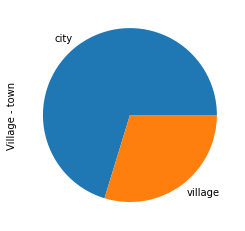

In [3]:
temp = df["Village - town"].value_counts()#analyze distribution of town v. city and show relevant visualization
temp.plot.pie()
print(temp/len(df))

From this, we can see that (in this dataset) roughly 70% of people say they are from cities, while roughly 30% say they are from villages.

count    1008.000000
mean        3.521825
std         1.268173
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Public speaking, dtype: float64

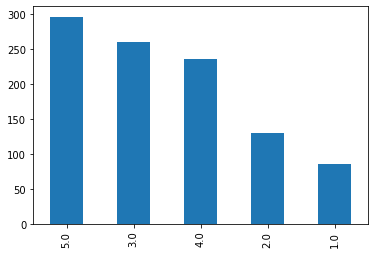

In [4]:
df["Public speaking"].value_counts().plot.bar()
df["Public speaking"].describe()

Here, we see that the 'average' fear of public spekaing is a ~3.5, meaning people are generally pretty afaid of public speaking. We also see that a 5, 'very afraid of,' is the most common report, which descends from there down to 1. Technically, the standard deviation is roughly 1.27, but that's not very relevant since the information is both discrete and very tightly boxed in, between 1 and 5. 

count    299.000000
mean       3.508361
std        1.288474
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Public speaking, dtype: float64

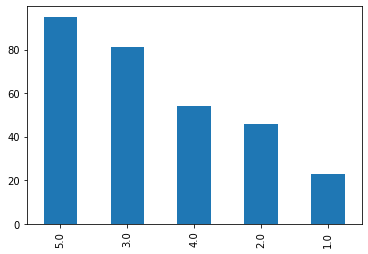

In [5]:
temp = df[df["Village - town"] == "village"]["Public speaking"]#get distribution for villagers
temp.value_counts().plot.bar()
temp.describe()

count    705.000000
mean       3.523404
std        1.258981
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Public speaking, dtype: float64

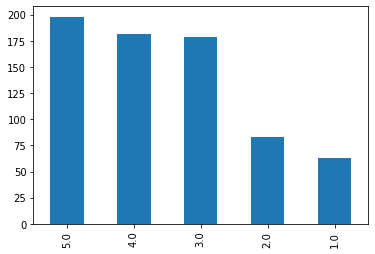

In [6]:
temp = df[df["Village - town"] == "city"]["Public speaking"]#get distribution for city peeps
temp.value_counts().plot.bar()
temp.describe()

From the initial visualization, it seems like the null hypothesis is correct, as the distributions seem nearly identical.

In [29]:
#For bootstrapping, we'll take a point statistic for city and bootstrap town
cityMean = df[df["Village - town"] == "city"]["Public speaking"].mean()

villData = df[df["Village - town"] == "village"]["Public speaking"]
villMeans = []#store the bootstrapped means here

for i in range(100000):
  villMeans.append(villData.sample(frac = 1, replace = True).mean())

pVal=0
for i in villMeans:#calculate pVal by checking what percentage of bootstrapped means are above the point statistic
  if i <= cityMean:
    pVal+=1
pVal/=len(villMeans)#divide the number of entries above the point statistic, by the total number of entries (entries being the bootstrapped Adelie body mass averages)
print(pVal)

0.58215


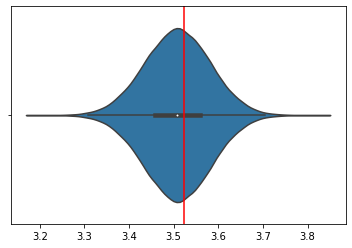

In [37]:
import matplotlib.pyplot as plt
sns.violinplot(x=villMeans)
plt.axvline(cityMean, 0, 1, color = "red")#draw a marker where the point statistic for city-peeps is

#Analysis  
So, with a Pval of ~58%, we have not proved the alternative hypothesis. As we can see from the visualization, the boostrapped village means are actually slightly lower than the city point statistic, which means they were recorded as having slightly less fear of public speaking (the opposite of our alternative hypothesis). However, there is not enough information to swing either way, as the Pval is anything but conclusive.